In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# load data image, gray scale

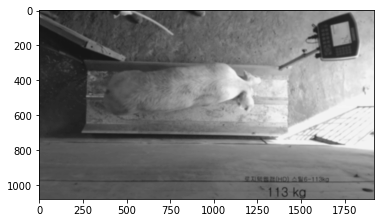

In [2]:
img = cv2.imread('./sample_image/sample113_1.png',0)
plt.imshow(img, cmap='gray', interpolation='bicubic')
plt.show()

In [3]:
img.shape

(1080, 1920)

# crop the images

In [5]:
img113_1 = cv2.imread('./sample_image/sample113_1.png',0)[200:700, 200:1500]
img114_1 = cv2.imread('./sample_image/sample114_1.png',0)[200:700, 200:1500]
img115_1 = cv2.imread('./sample_image/sample115_1.png',0)[200:700, 200:1500]
img115_2 = cv2.imread('./sample_image/sample115_2.png',0)[200:700, 200:1500]
img118_1 = cv2.imread('./sample_image/sample118_1.png',0)[200:700, 200:1500]
img120_1 = cv2.imread('./sample_image/sample120_1.png',0)[200:700, 200:1500]
img123_1 = cv2.imread('./sample_image/sample123_1.png',0)[200:700, 200:1500]

In [6]:
img113_1.shape

(500, 1300)

In [7]:
img113_1

array([[ 21,  21,  21, ..., 151, 151, 151],
       [ 21,  21,  21, ..., 151, 151, 151],
       [ 21,  21,  21, ..., 152, 152, 152],
       ..., 
       [ 32,  32,  32, ..., 197, 194, 189],
       [ 32,  32,  32, ..., 196, 193, 191],
       [ 32,  32,  32, ..., 196, 197, 199]], dtype=uint8)

In [8]:
X0 = np.array([img113_1, img114_1, img115_1, img115_2, img118_1, img120_1, img123_1])

# scaling images

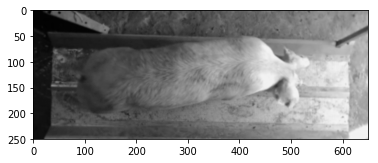

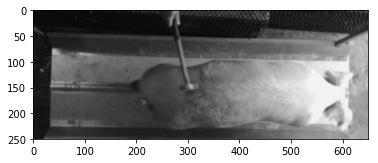

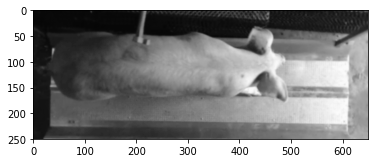

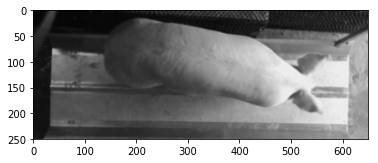

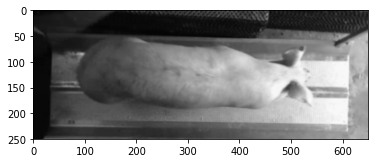

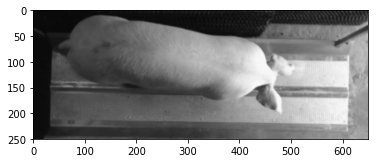

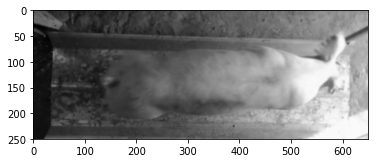

In [9]:
tmp = []
for img in X0:
#     print(img.shape)
    res = cv2.resize(img,(int(X0.shape[2]/2), int(X0.shape[1]/2)), interpolation = cv2.INTER_CUBIC)
    tmp.append(res)
    plt.imshow(res, cmap='gray', interpolation='bicubic')
    plt.show()
X = np.array(tmp)    

Preferable interpolation methods are cv2.INTER_AREA for shrinking and cv2.INTER_CUBIC (slow) & cv2.INTER_LINEAR for zooming. 

In [10]:
# Mean, standard deviation of input data 

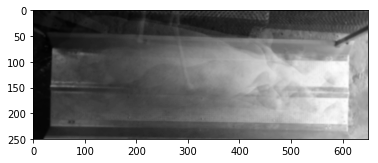

In [11]:
mean_img = np.average(X, axis=0)
plt.imshow(mean_img, cmap='gray', interpolation='bicubic')
plt.show()

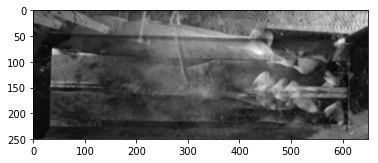

In [12]:
std_img = np.std(X, axis=0)
plt.imshow(std_img, cmap='gray', interpolation='bicubic')
plt.show()

# Normalizing image

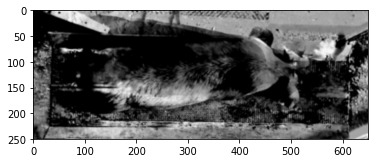

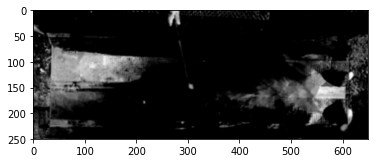

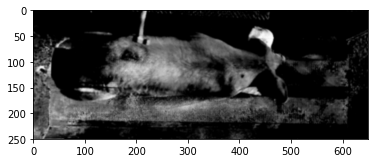

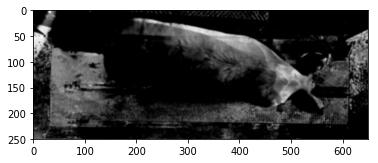

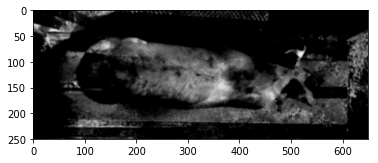

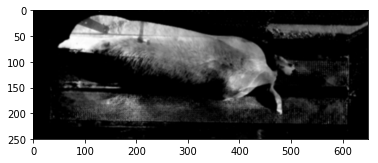

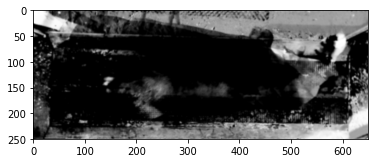

In [13]:
tmp = []
for img in X:
    res = (img - mean_img)/std_img
    res[res<0] = 0
    tmp.append(res)
    plt.imshow(res, cmap='gray', interpolation='bicubic')
    plt.show()    
X_norm1 = np.array(tmp)    

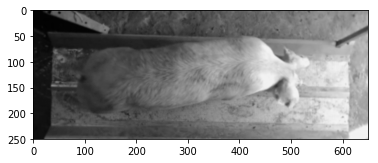

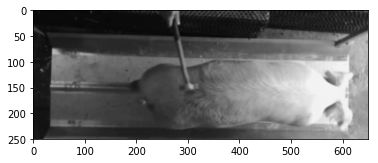

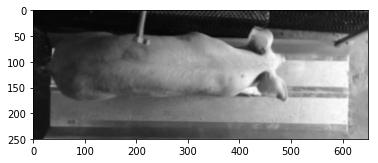

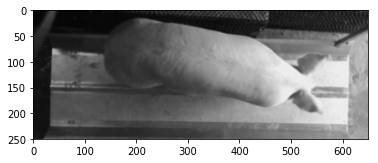

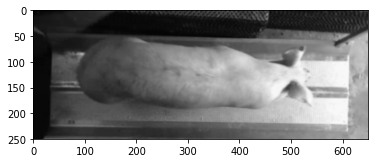

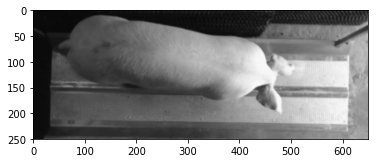

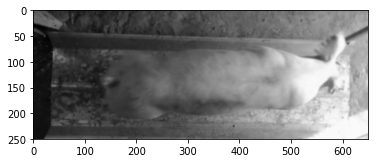

In [14]:
tmp = []
for img in X:
    res = img/255
    tmp.append(res)
    plt.imshow(res, cmap='gray', interpolation='bicubic')
    plt.show()    
X_norm2 = np.array(tmp)    

# Image Augmentation

In [15]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [16]:
train_generator = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=5,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,)

In [17]:
X_new = X[:,:,:,np.newaxis]
train_generator.fit(X_new)

In [18]:
# for i in range(len(X_new)):
#     plt.imshow(X_new[i, :, :, 0], cmap='gray', interpolation='bicubic')
#     plt.show()
#     plt.xticks([])
#     plt.yticks([])

In [19]:
batch_size = 7
iterator = train_generator.flow(X_new[:batch_size])

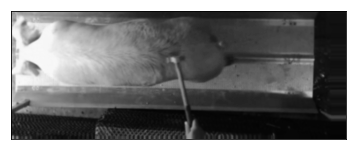

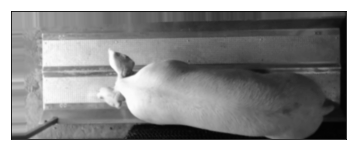

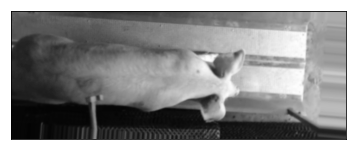

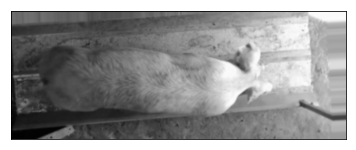

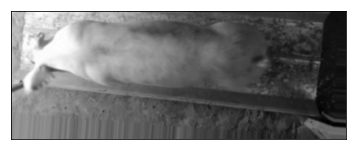

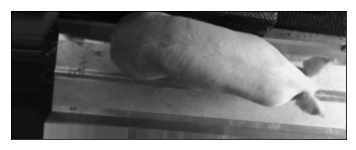

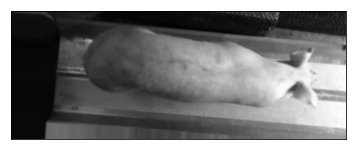

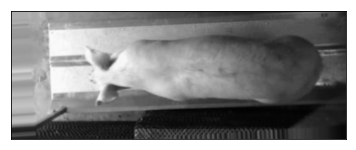

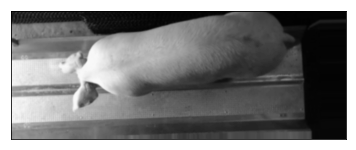

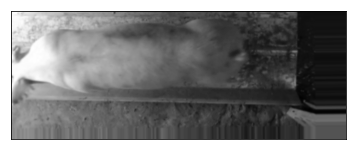

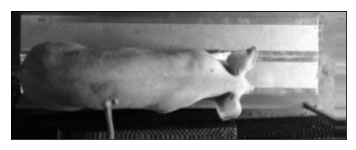

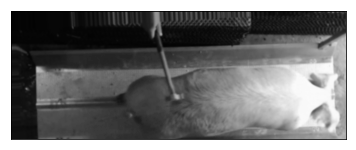

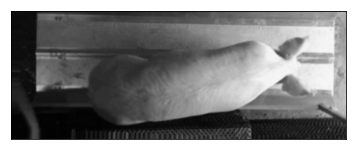

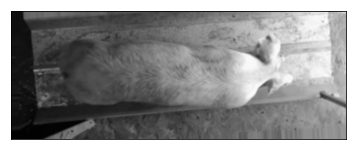

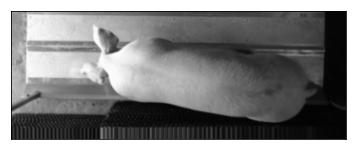

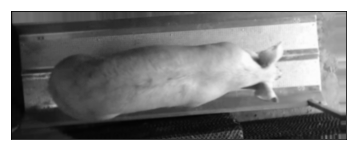

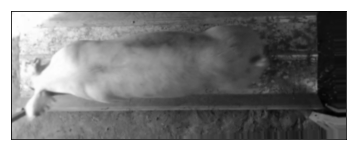

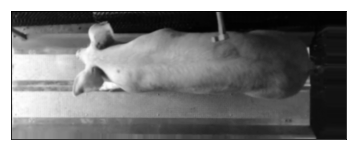

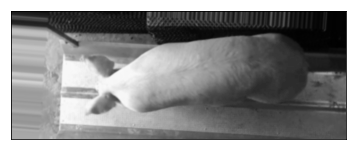

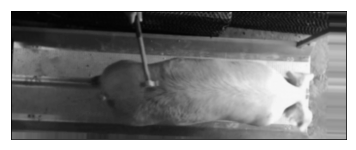

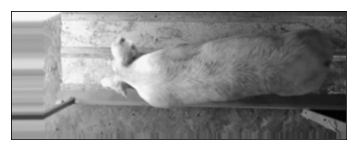

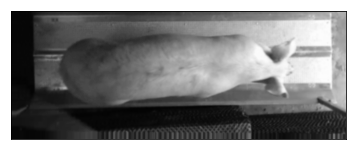

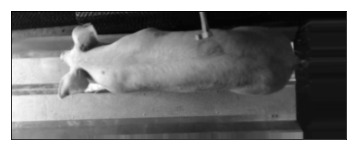

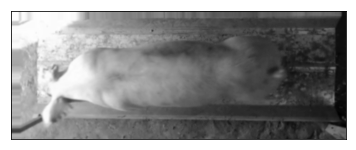

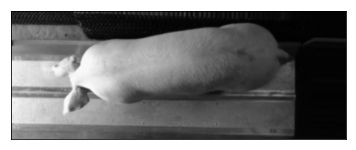

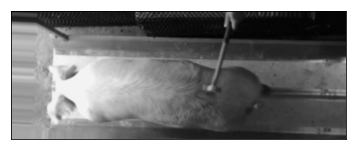

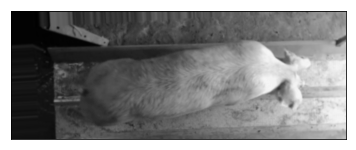

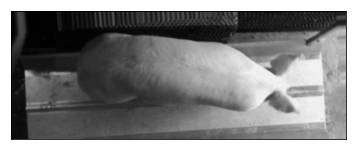

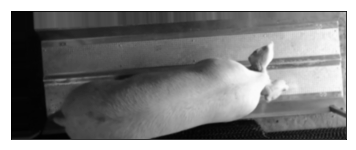

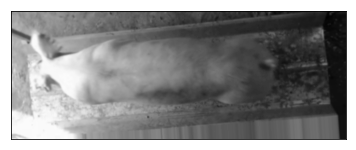

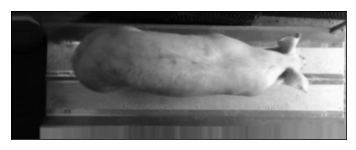

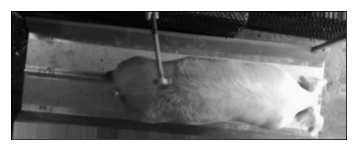

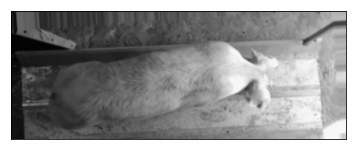

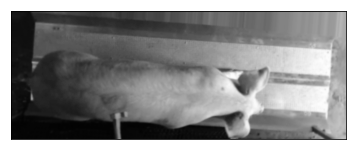

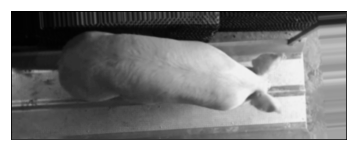

In [20]:
for i in range(int(35 / batch_size)):
    x_augs = iterator.next()
    for j in range(batch_size):
#         plt.subplot(5, 7, batch_size * i + j + 1)
        plt.imshow(x_augs[j, :, :, 0], cmap='gray', interpolation='bicubic')
        plt.xticks([])
        plt.yticks([])
        plt.show()
plt.tight_layout()

# Image flatten

In [21]:
print(np.shape(X[1].flatten() / 255.))
img113_1.flatten() / 255.

(162500,)


array([ 0.08235294,  0.08235294,  0.08235294, ...,  0.76862745,
        0.77254902,  0.78039216])

In [22]:
tmp = []
for img in X:
    res = img.flatten() / 255.
    tmp.append(res)
X_flatten = np.array(tmp)    

In [23]:
print(X_flatten.shape)
X_flatten

(7, 162500)


array([[ 0.08235294,  0.08235294,  0.08235294, ...,  0.79215686,
         0.77254902,  0.76470588],
       [ 0.07843137,  0.07843137,  0.08235294, ...,  0.6627451 ,
         0.65490196,  0.64705882],
       [ 0.08627451,  0.08235294,  0.09019608, ...,  0.65882353,
         0.65098039,  0.64705882],
       ..., 
       [ 0.09803922,  0.09803922,  0.09803922, ...,  0.67058824,
         0.66666667,  0.65882353],
       [ 0.08627451,  0.08627451,  0.08627451, ...,  0.63921569,
         0.63529412,  0.61568627],
       [ 0.34509804,  0.36470588,  0.38039216, ...,  0.81568627,
         0.88627451,  0.9254902 ]])